In [1232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.preprocessing import LabelBinarizer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error as MSE

2. Projet 1  Les pingouins

In [1233]:
# Chargement du dataset des pingouins
penguins = pd.read_csv('../csv/penguins_size.csv', sep=',')
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [1234]:
# Définition des spécimens et de leurs caractéristiques
penguins.dropna(inplace=True)
species = penguins["species"]
features = penguins.iloc[:, 2:4]

# Split du dataset à 80% pour entrainement, 20% pour les tests
features_train, features_test, species_train, species_test= train_test_split(
    features, species,
    test_size=0.2,
    stratify=species,
    random_state=1)

# Instantiation d'un arbre de classification
dt = DecisionTreeClassifier(max_depth=1, random_state=1)

# Ajustement des données d'entrainement
dt = dt.fit(features_train, species_train)

# Prédiction des spécimens avec 20% des données pour les tests
species_pred = dt.predict(features_test) 

# Evaluation de la précision des prédictions avec les valeurs de tests
print(accuracy_score(species_test, species_pred))

# culmens
x, y = penguins["culmen_length_mm"], penguins["culmen_depth_mm"]

0.7014925373134329


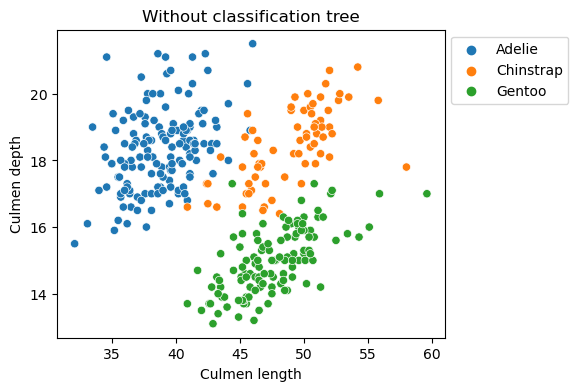

In [1235]:
# Plot des Espèces sans arbre de classification
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(
    data=penguins, 
    x=x, y=y, 
    hue="species", ax=ax)
ax.set_xlabel("Culmen length")
ax.set_ylabel("Culmen depth")
ax.set_title("Without classification tree")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

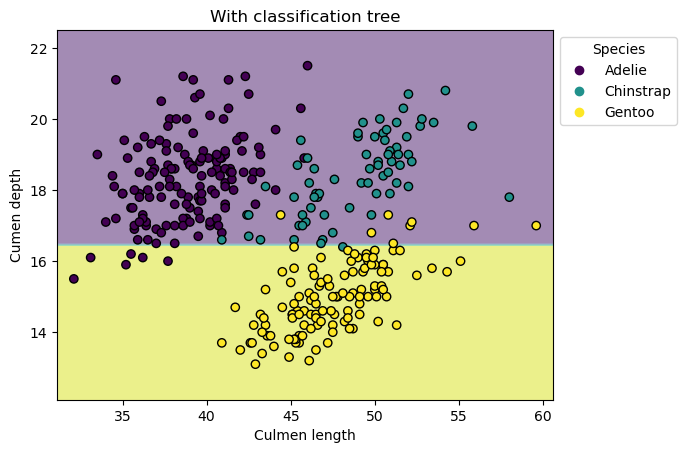

In [1236]:
# Encodage des espèces
le = LabelEncoder()
penguins["species_encoded"] = le.fit_transform(species)
classes = list(le.classes_)

disp = DecisionBoundaryDisplay.from_estimator(
    dt, features, 
    response_method="predict",
    xlabel="Culmen length", ylabel="Cumen depth",
    alpha=0.5
    )
scatter = disp.ax_.scatter(
    features.iloc[:, 0], features.iloc[:, 1], 
    c=penguins["species_encoded"], edgecolor="k")

legend_handles, legend_labels = scatter.legend_elements()
legend_labels = classes
legend1 = disp.ax_.legend(
    handles=legend_handles, labels=legend_labels, 
    title="Species",
    loc="upper left", bbox_to_anchor=(1,1))
plt.title("With classification tree")
plt.show()

L'arbre de classification a utilisé la variable 'cumen depth' pour partionner le jeu de données.

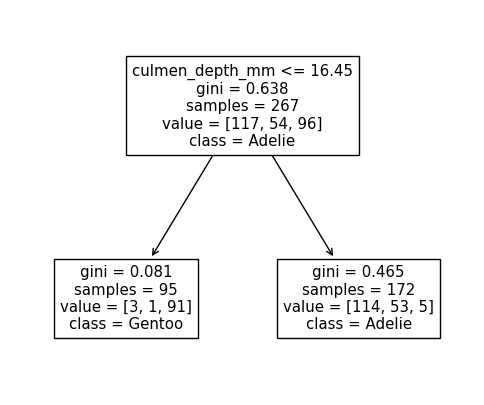

In [1237]:
features_tree = features.columns
classes_tree = classes

# Affichage de l'arbre de classification
plt.figure(figsize=(6,5))
tree.plot_tree(dt, feature_names=features_tree, class_names=classes_tree)
plt.show()

On observe que les feuilles ne regroupent que les classes Gentoo et Adelie. L'indice de gini de 0.465 indique que le résultat pourrait comporter d'autres classes.  
Le model de profondeur 2  est incapable de détecter la classe Chinstrap. 

In [1238]:
features_test

,culmen_length_mm,culmen_depth_mm
289,50.7,15.0
313,49.5,16.1
208,45.2,16.6
146,39.2,18.6
274,46.5,14.4
...,...,...
215,55.8,19.8
78,36.2,16.1
191,53.5,19.9
102,37.7,16.0


In [1239]:
# Spéciemen à prédire
test = pd.DataFrame({'culmen_length_mm': [35], 'culmen_depth_mm': [17]})

# Probabilités des prédictions des classes
prediction = dt.predict_proba(test)[0]

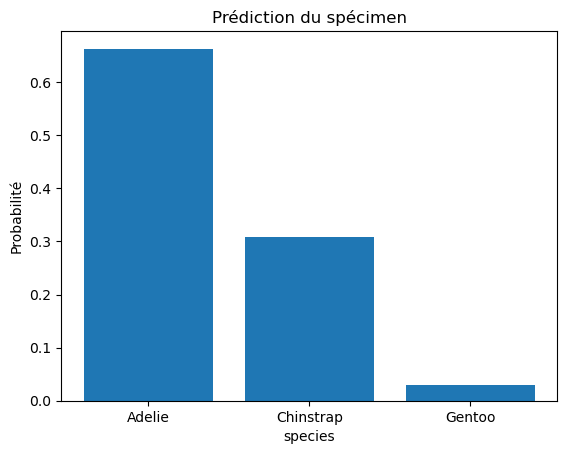

In [1240]:
fig, ax = plt.subplots()
ax.bar(classes, prediction)
ax.set_xlabel('species')
ax.set_ylabel('Probabilité')
ax.set_title('Prédiction du spécimen')
plt.show()

D'après la figure de prédiction, il y a environ 70 % de probabilité que la classe soit Adelie pour l'échantillon donné, 30 % pour Chinstrap et moins de 5 % pour Gentoo.  

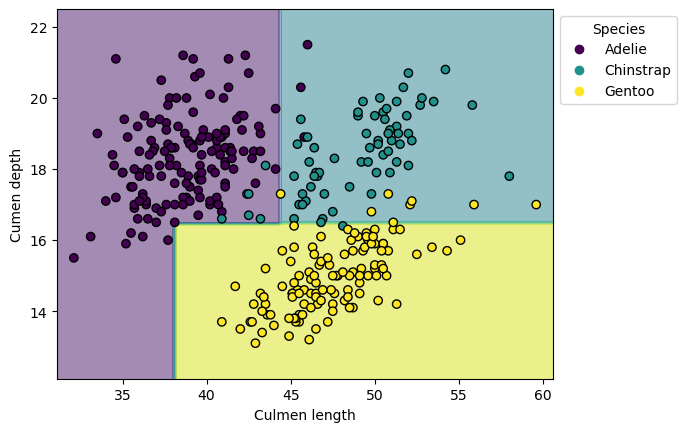

In [1241]:
# Instantiation d'un arbre de classification
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Ajustement des données d'entrainement
dt = dt.fit(features_train, species_train)

# Plot des Espèces avec partition de l'arbre de classification
disp = DecisionBoundaryDisplay.from_estimator(
    dt, features, 
    response_method="predict",
    xlabel="Culmen length", ylabel="Cumen depth",
    alpha=0.5
    )
scatter = disp.ax_.scatter(
    features.iloc[:, 0], features.iloc[:, 1], 
    c=penguins["species_encoded"], edgecolor="k")

legend_handles, legend_labels = scatter.legend_elements()
legend_labels = list(le.classes_)
legend1 = disp.ax_.legend(
    handles=legend_handles, labels=legend_labels, 
    title="Species",
    loc="upper left", bbox_to_anchor=(1,1))
plt.show()

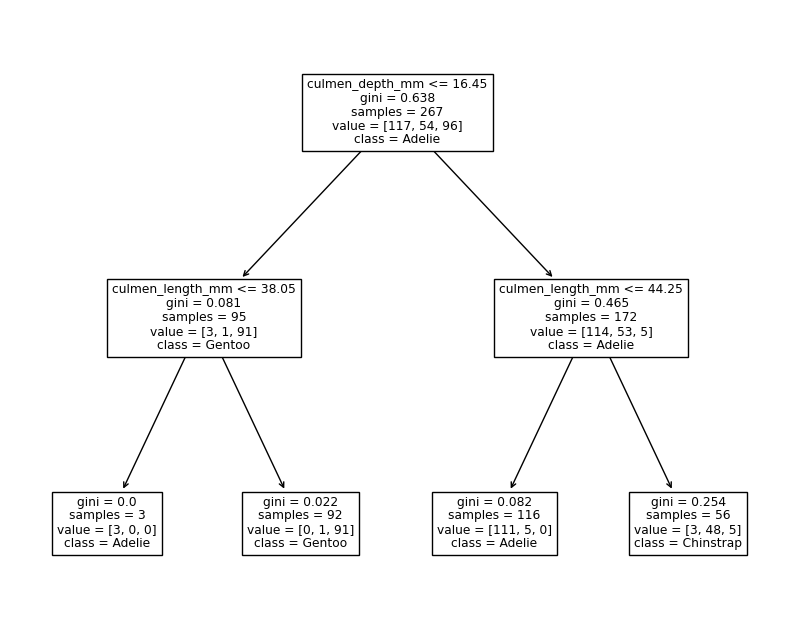

In [1242]:
# Affichage de l'arbre de classification
plt.figure(figsize=(10,8))
tree.plot_tree(dt, feature_names=features_tree, class_names=classes_tree)
plt.show()

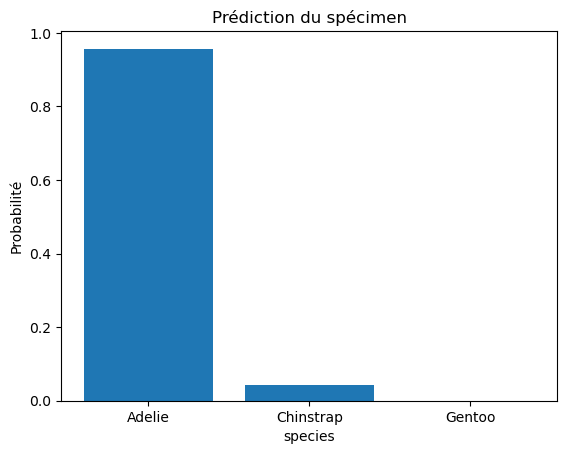

In [1243]:
# Spéciemen à prédire
test = pd.DataFrame({'culmen_length_mm': [35], 'culmen_depth_mm': [17]})

# Probabilités des prédictions des classes
prediction = dt.predict_proba(test)[0]

fig, ax = plt.subplots()
ax.bar(classes, prediction)
ax.set_xlabel('species')
ax.set_ylabel('Probabilité')
ax.set_title('Prédiction du spécimen')
plt.show()

3. Projet 2 Cancer du sein

3.1 Exercice 1

In [1244]:
# Chargement du dataset
dataset = pd.read_csv('../csv/data.csv', sep=',')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [1245]:
# Classes (diagnostiques) + caractéristiques
new_dataset = dataset[["diagnosis", "radius_mean", "concave points_mean"]]
diagnostic = dataset["diagnosis"]
features = dataset[["radius_mean", "concave points_mean"]]

In [1246]:
# Encodage des diagnostics
new_dataset = new_dataset.copy()
le = LabelEncoder()
new_dataset.loc[:, "diag encoded"] = le.fit_transform(diagnostic)
classes = list(le.classes_)
classes

['B', 'M']

In [1247]:
# Split du dataset à 80% pour entrainement, 20% pour les tests
X_train, X_test, y_train, y_test= train_test_split(
    features, diagnostic,
    test_size=0.2,
    stratify=diagnostic,
    random_state=1)

# Instantiation de l'arbre de décision
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Ajustement des données d'entrainement
dt = dt.fit(X_train, y_train)

# Prédiction des diagnostics avec 20% des données pour les tests
y_pred = dt.predict(X_test)

In [1248]:
# Affichage des prédictions du diagnostic pour les cinq premières valeurs
X_test["diagnostic"] = y_pred
X_test.head()

,radius_mean,concave points_mean,diagnostic
196,13.770,0.06526,B
120,11.410,0.02623,B
151,8.219,0.02168,B
280,19.160,0.09664,M
288,11.260,0.05588,B


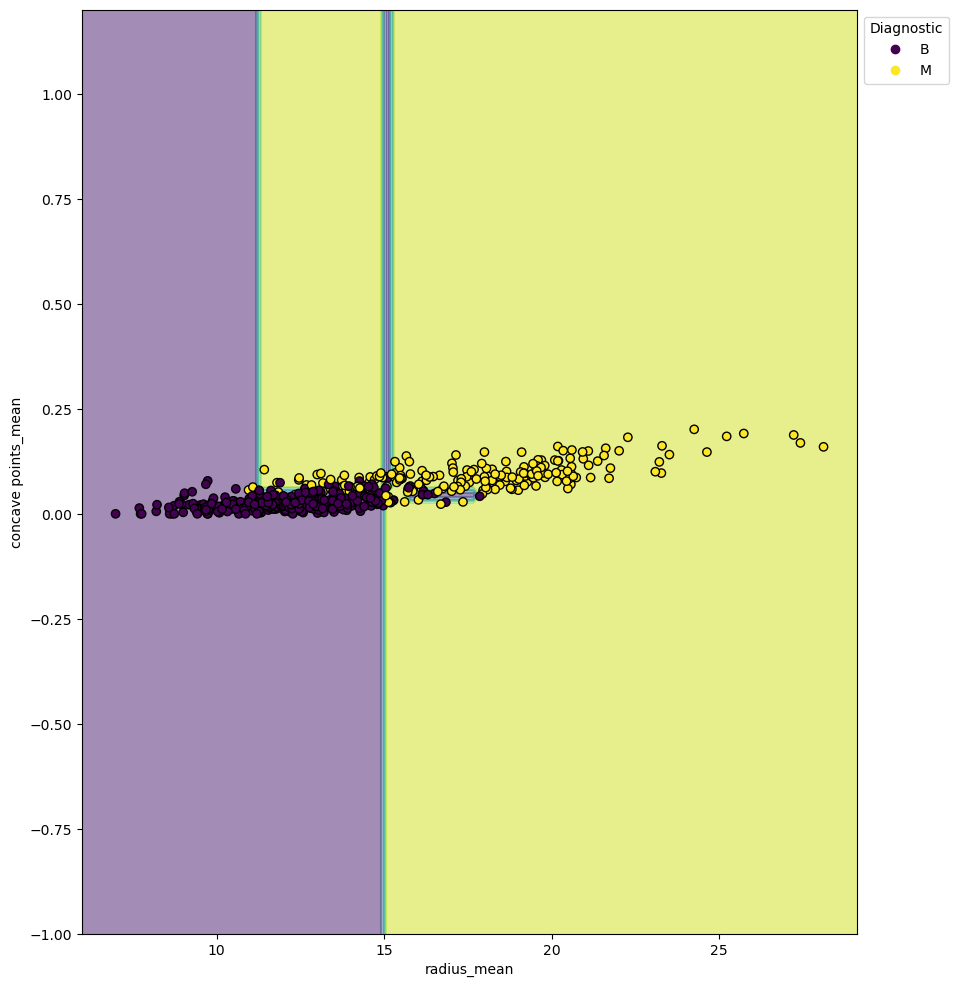

In [1249]:
disp = DecisionBoundaryDisplay.from_estimator(
    dt, features, 
    response_method="predict",
    xlabel="radius_mean", ylabel="concave points_mean",
    alpha=0.5
    )
scatter = disp.ax_.scatter(
    features.iloc[:, 0], features.iloc[:, 1], 
    c=new_dataset["diag encoded"], edgecolor="k")

legend_handles, legend_labels = scatter.legend_elements()
legend_labels = classes
legend1 = disp.ax_.legend(
    handles=legend_handles, labels=legend_labels, 
    title="Diagnostic",
    loc="upper left", bbox_to_anchor=(1,1))

# Redimentionnement de la figure
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.show()

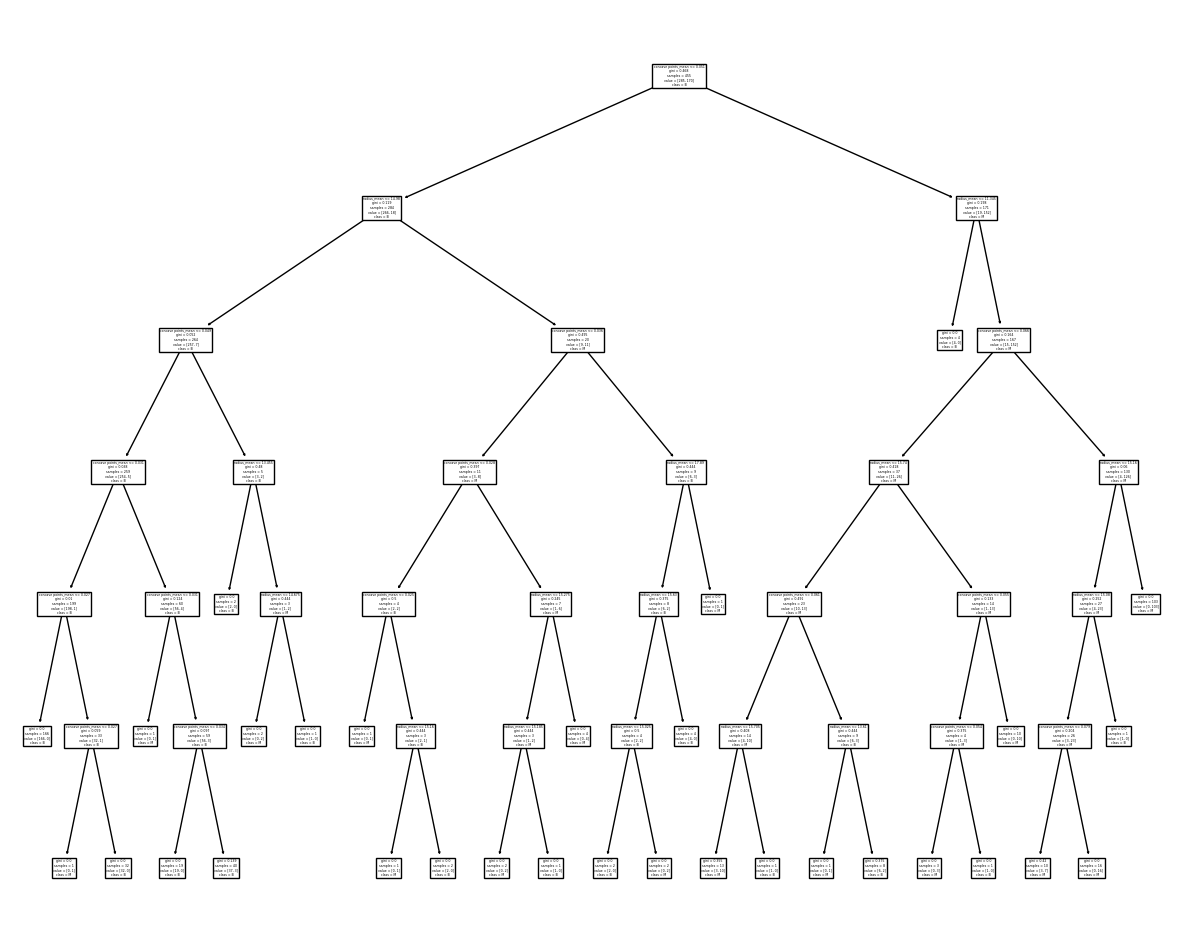

In [1250]:
# Affichage de l'arbre de classification
features_tree = features.columns
classes_tree = classes
plt.figure(figsize=(15,12))
tree.plot_tree(dt, feature_names=features_tree, class_names=classes_tree)
plt.show()

Nous constatons un sur-apprentissage du model en choisissant une profondeur de 6.*
Une profondeur de 2 aurait été suffisante comme le montre le graph ci dessous

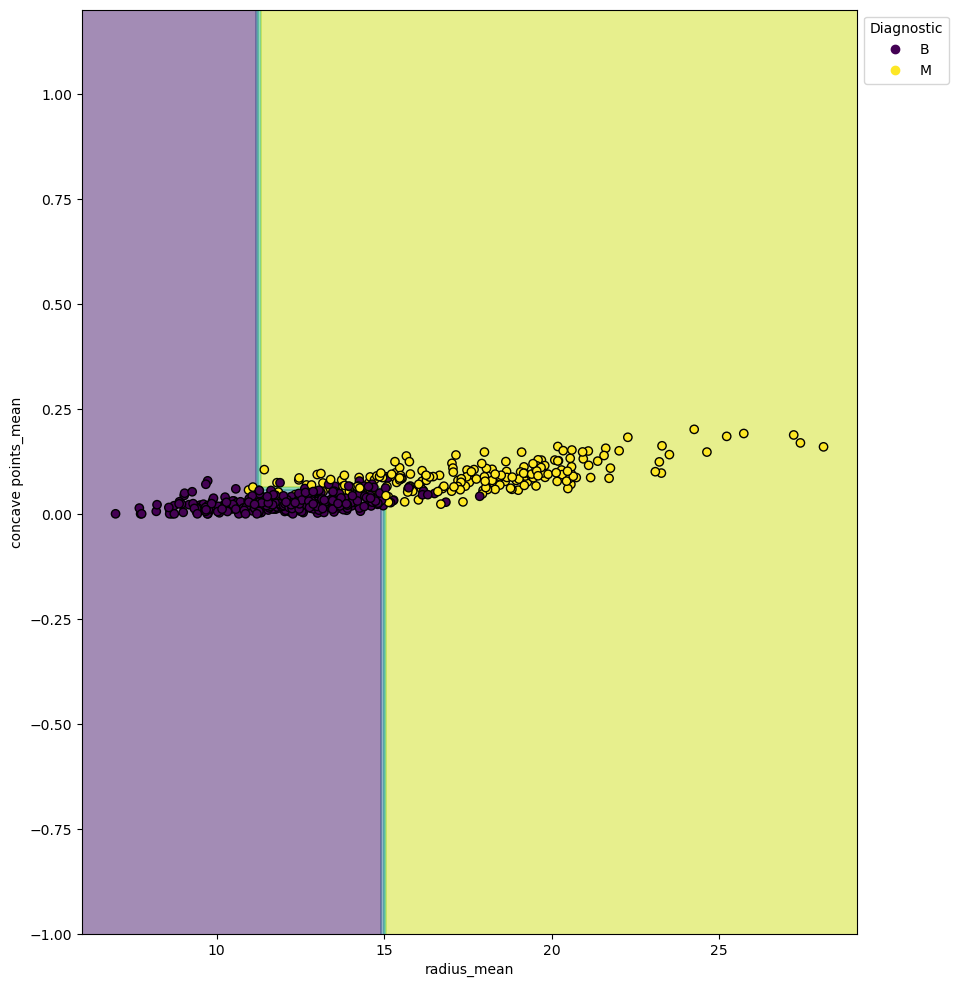

In [1251]:
# deep 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
dt = dt.fit(X_train, y_train)

disp = DecisionBoundaryDisplay.from_estimator(
    dt, features, 
    response_method="predict",
    xlabel="radius_mean", ylabel="concave points_mean",
    alpha=0.5
    )
scatter = disp.ax_.scatter(
    features.iloc[:, 0], features.iloc[:, 1], 
    c=new_dataset["diag encoded"], edgecolor="k")

legend_handles, legend_labels = scatter.legend_elements()
legend_labels = classes
legend1 = disp.ax_.legend(
    handles=legend_handles, labels=legend_labels, 
    title="Diagnostic",
    loc="upper left", bbox_to_anchor=(1,1))

# Redimentionnement de la figure
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.show()

3.2 Exercice 2

In [1252]:

accuracy_score(y_test, y_pred)

0.8859649122807017

- L'indice de Gini indique "l'impureté" d'un noeud dans l'arbre de décision. Il indique dans quelle mesure les échantillons qu'il contient appartiennent à la même classe. Un gini de 0 signifie que le noeud est parfaitement "pur".

- L'entropie mesure la désorganisation ou l'impureté de l'ensemble des données d'un noeud. Un nœud qui contient des instances de classes uniformes a une entropie de 0. 

L'indice de Gini est préferé lorque la vitesse de calcul est un critère important ou pour des arbres de régression. L'entropie est plus lent à calculer. Mais le choix entre les 2 est négligeable pour des petits ou moyens ensembles de données.

In [1253]:
# Sélection de l'ensemble des caractéristiques
features = dataset.iloc[:, 2:-1]

# Split du dataset à 80% pour entrainement, 20% pour les tests
X_train, X_test, y_train, y_test = train_test_split(
    features, diagnostic,
    test_size=0.2,
    stratify=diagnostic,
    random_state=1)

# Instantiation de l'arbre de décision
dt1 = DecisionTreeClassifier(max_depth=6, criterion="gini", random_state=1)
dt2 = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=1)

# Ajustement sur les données d'entrainement
dt1 = dt1.fit(X_train, y_train)
dt2 = dt2.fit(X_train, y_train)

# Prédiction des diagnostics avec 20% des données pour les tests
y1_pred = dt1.predict(X_test)
y2_pred = dt2.predict(X_test)

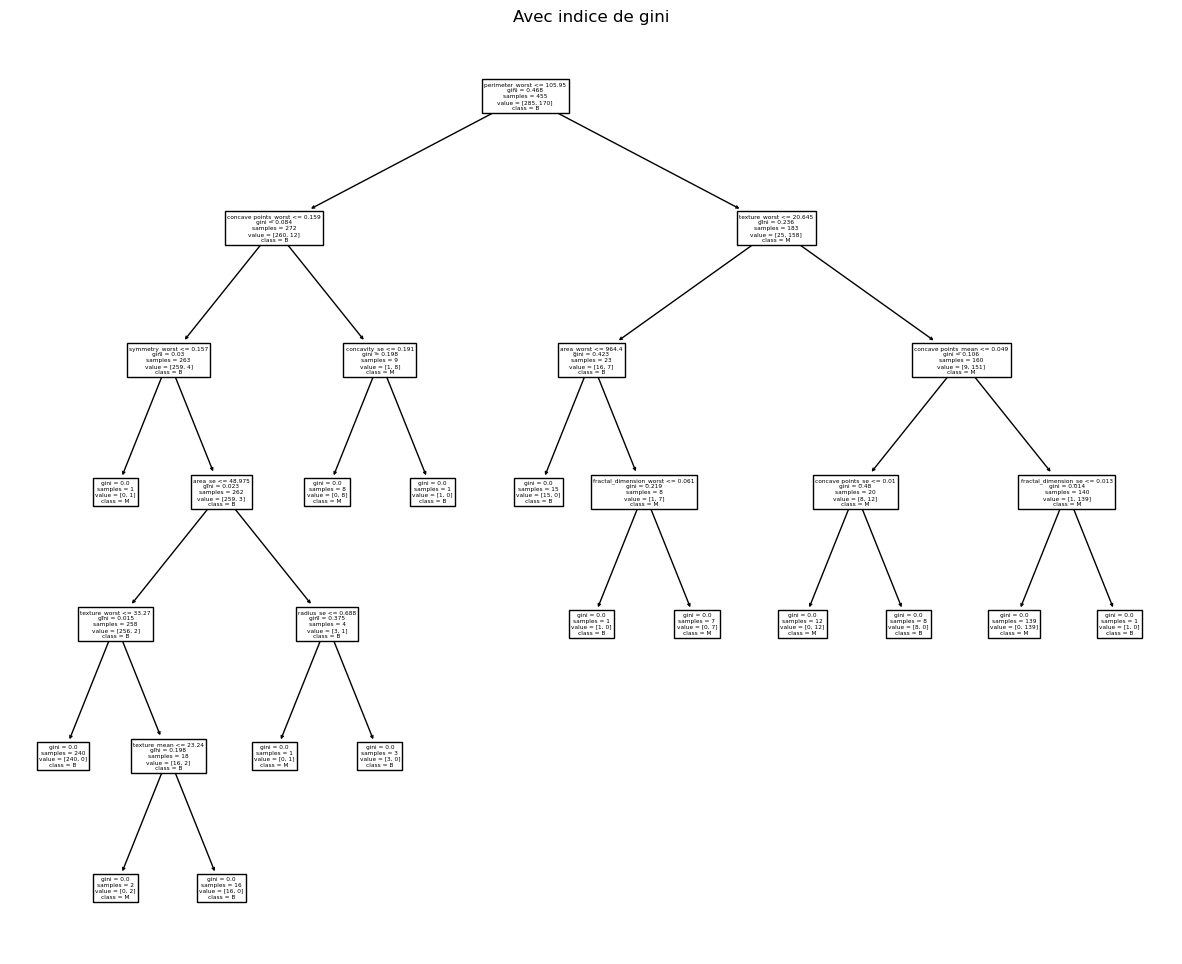

In [1254]:
# Affichage de l'arbre de classification avec l'indice de Gini
features_tree = features.columns
classes_tree = classes
plt.figure(figsize=(15,12))
tree.plot_tree(
    dt1, 
    feature_names=features_tree, 
    class_names=classes_tree)
plt.title("Avec indice de gini")
plt.show()

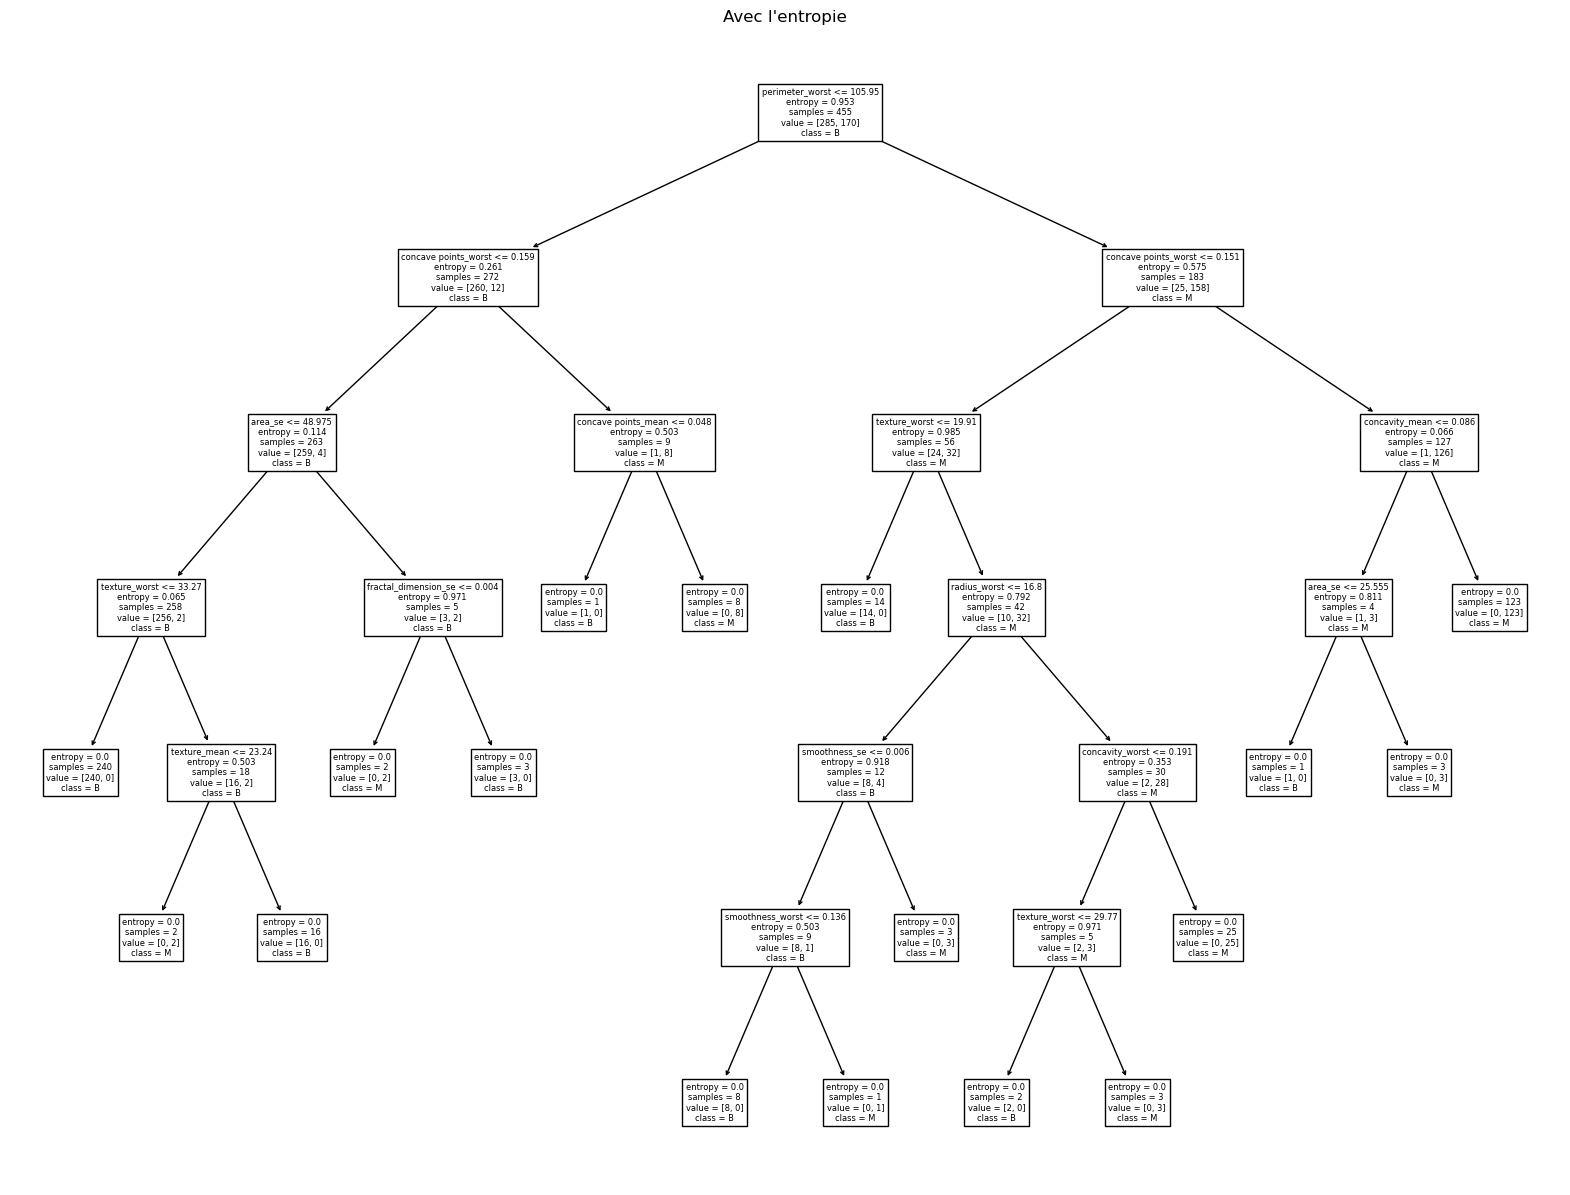

In [1255]:
# Affichage de l'arbre de classification avec l'entropie
features_tree = features.columns
classes_tree = classes
plt.figure(figsize=(20,15))
tree.plot_tree(dt2, feature_names=features_tree, class_names=classes_tree)
plt.title("Avec l'entropie")
plt.show()

In [1256]:
print("Performance (indice de gini) = ", accuracy_score(y_test, y1_pred))
print("Performance (entropie) = ", accuracy_score(y_test, y2_pred))

Performance (indice de gini) =  0.9298245614035088
Performance (entropie) =  0.9298245614035088


3.3 Exercice 3

La métrique accurancy mesure de taux de prédictions corrects sur l'ensemble des échantillons.
D'après une matrice de confusion :

accurancy = (TP + TN) / (TP +TN + FP + FN)

Avec TP et TN = vrai positif et vrai négatif
Avec FP et FN = faux positif et faux 

L’accuracy présente cependant de fortes limites en présence de données déséquilibrées (imbalanced data). Des données sont dites déséquilibrées lorsqu’une des classes est plus fréquente que l’autre (par exemple plus d’individus négatifs que positifs)

La precision correspond au taux de prédictions correctes parmi les prédictions positives.

precison = TP / (TP + FP)

Elle mesure la capacité du modèle à ne pas faire d’erreur lors d’une prédiction positive.

Le recall correspond au taux d’individus positifs détectés par le modèle.

recall = TP / (TP + FN)

Il mesure la capacité du modèle à détecter l’ensemble des individus positifs.

Le F1-score évalue la capacité d’un modèle de classification à prédire efficacement les individus positifs, en faisant un compromis entre la precision et le recall.
Il permet de résumer les valeurs de la precision et du recall en une seule métrique.

F1-score = TP / (TP + 1/2*(FP + FN))

Un F1-score de 50% équivaut à TP = ½ (FN + FP) et s’interprète donc de la façon suivante : pour une prédiction positive correcte, le modèle fait deux erreurs (faux négatif ou faux positif).

La sensibilité (ou recall) est le taux d’individus positifs correctement prédits par le modèle.

sensitivité = TP / (TP + FN)

Elle mesure la capacité du modèle à détecter l’ensemble des individus positifs.


La specificity est le taux d’individus négatifs correctement prédits par le modèle.

specificity = TN / (TN + FP)

Elle mesure la capacité du modèle à détecter l’ensemble des individus négatifs.

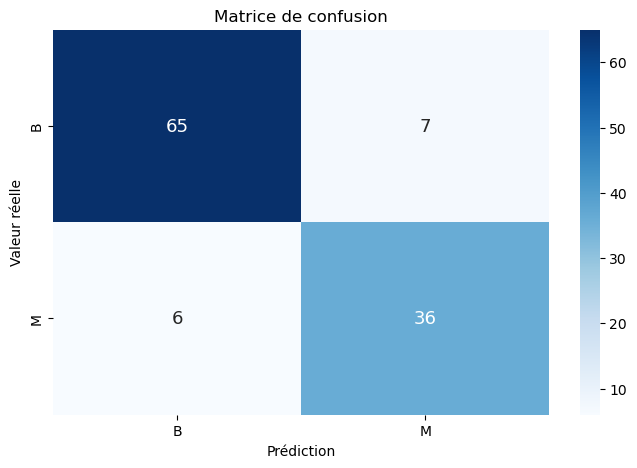

In [1257]:
# Calcul de la matrice de confusion
mc = confusion_matrix(y_test, y_pred, labels=classes)

# Représentation matrice de confusion
cmap = sns.light_palette("navy", as_cmap=True)
plt.figure(figsize=(8,5))
sns.heatmap(
    mc, annot=True, 
    fmt='d', cmap='Blues', 
    xticklabels=classes, yticklabels=classes,
    annot_kws={"size": 13})
plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')
plt.title("Matrice de confusion")
plt.show()

In [1258]:
# Prédiction des probabilités de la classe positive (M)
y1_pred_prob = dt1.predict_proba(X_test)[:, 1]
y2_pred_prob = dt1.predict_proba(X_test)[:, 1]

In [1259]:
# Calcul des taux de faux positifs et vrais positifs
fpr1, tpr1, thresholds1 = roc_curve(y_test, y1_pred_prob, pos_label='M')
fpr2, tpr2, thresholds2 = roc_curve(y_test, y2_pred_prob, pos_label='M')

# Calcul de l'AUC
roc_auc1 = roc_auc_score(y_test, y1_pred_prob)
roc_auc2 = roc_auc_score(y_test, y2_pred_prob)

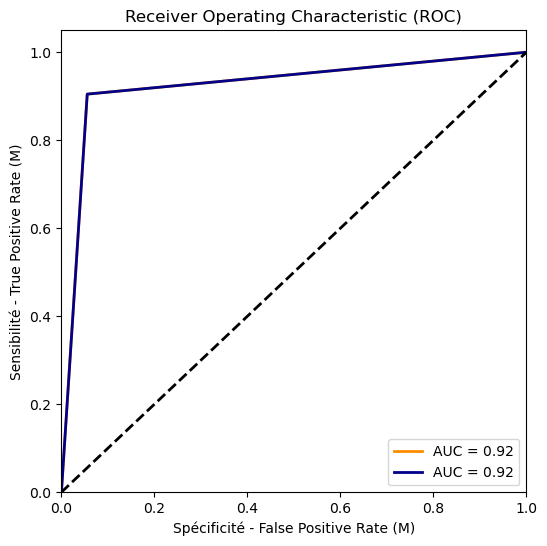

In [1260]:
# Courbe ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'AUC = {roc_auc1:.2f}')
plt.plot(fpr2, tpr2, color='darkblue', lw=2, label=f'AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Spécificité - False Positive Rate (M)')
plt.ylabel('Sensibilité - True Positive Rate (M)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

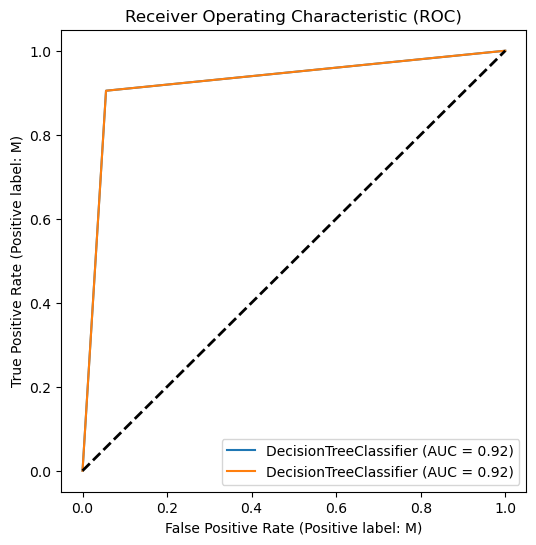

In [1261]:
fig, ax = plt.subplots(figsize=(6,6))
RocCurveDisplay.from_estimator(dt1, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(dt2, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

Un AUC < 0.5 indique que le modèle est complétement inutile et faire pire que des prédictions aléatoires(AUC=0.5).
Le compromis entre les 2 métriques sensibilité et la spécificité permet d'avoir le meilleur équilibre entre ces deux mesures. Le but est de trouver le seuil où la combinaison de ces erreurs est acceptable pour l'application spécifique pour laquelle le modèle est conçu.
Dans notre exemple sur le cancer, la courbe ROC (AUC) donne une aire de 92 % sous la courbe indiquant que le modèle est très performant pour déceler aussi bien les vrais positifs que les faux positifs. 

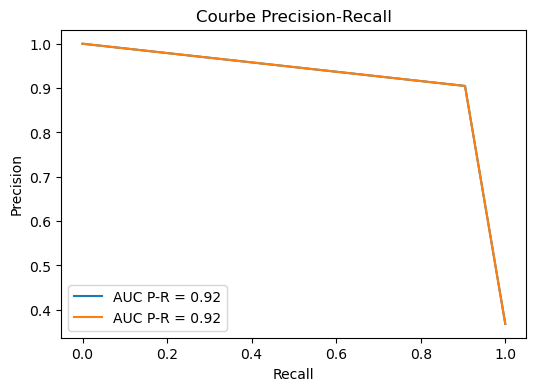

In [1262]:
# Calcul de la précision et du rappel pour plusieurs seuils
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y1_pred_prob, pos_label='M')
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y2_pred_prob, pos_label='M')

# Calcul de l'AUC
auc1 = auc(recall1, precision1)
auc2 = auc(recall2, precision2)

# Courbe Precision-Recall
plt.figure(figsize=(6, 4))
plt.plot(recall1, precision1, label=f'AUC P-R = {auc1:.2f}')
plt.plot(recall2, precision2, label=f'AUC P-R = {auc2:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbe Precision-Recall')
plt.legend(loc='best')
plt.show()

Dans le contexte de la classification binaire, les termes "sensibilité" et "rappel" désignent le même concept.

Le compromis entre les 2 métriques Rappel et précision permet d'avoir le meilleur équilibre entre ces deux mesures. Le but est de trouver le seuil où la combinaison de ces erreurs est acceptable pour l'application spécifique pour laquelle le modèle est conçu.
Sur la courbe ci-dessus l'AUC-PR (AUC-Precision Recall) est de 92 % indiquant une bonne performance du modèle.

4. Projet 3

Exercice 1

In [1263]:
# Chargement du dataset
dataset = pd.read_csv('../csv/auto-mpg.csv', sep=',')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [1264]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [1265]:
# Valeurs manquantes
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [1266]:
# Affichage des valeurs uniques
dataset["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [1267]:
# Remplacement des valeurs non numériques
dataset.replace("?", '0', inplace=True)

# Changement de type de la variable 'horsepower'	
dataset["horsepower"] = dataset["horsepower"].astype(int)

In [1268]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)
features = dataset.iloc[:, 1:7]
conso = dataset['mpg'] 

# Split du dataset à 80% pour entrainement, 20% pour les tests
X_train, X_test, y_train, y_test = train_test_split(
    features, conso,
    test_size=0.2,
    random_state=1)

In [1269]:
# Entrainenement du modèle + prédiction
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Calcul du MSE sur les données réelles
mse_dt = MSE(y_test, y_pred)

# Calcul du RMSE
rmse_dt = mse_dt**(1/2)

# Calcul de la MAE
mae = MAE(y_test, y_pred)


In [1270]:
print("MSE = ", mse_dt, "\nRMSE = ", rmse_dt, "\nMAE = ", mae)

MSE =  13.309887784246254 
RMSE =  3.64827189012089 
MAE =  2.7322542108274868


Le MSE (Mean Squared Error), RMSE (Root Mean Squared Error) et MAE (Mean Absolute Error) sont des métriques utilisées pour mesurer la précision des valeurs prédites (y_pred) par un modèle de régression par rapport aux valeurs réelles (y_test).

Le MSE est la moyenne des carrés des écarts entre les prédictions et les valeurs réelles. Il donne une importance plus grande aux erreurs plus importantes (car elles sont élevées au carré avant d'être moyennées), ce qui peut être souhaitable dans des contextes où de grandes erreurs sont particulièrement indésirables.

Le RMSE est simplement la racine carrée du MSE. Il est dans les mêmes unités que la variable cible et peut être plus interprétable que le MSE car il est à l'échelle des données. Comme le MSE, le RMSE pénalise les grandes erreurs plus fortement que les petites.

Le MAE est la moyenne des valeurs absolues des écarts entre les prédictions et les valeurs réelles. Contrairement au MSE et au RMSE, le MAE n'accorde pas une importance disproportionnée aux grandes erreurs, ce qui en fait une mesure robuste contre les valeurs aberrantes.

In [1271]:
# RMSE sur les données d'entrainement
y_pred = dt.predict(X_train)
MSE_train = MSE(y_train, y_pred)
RMSE_train = MSE_train**(1/2)
RMSE_train

3.8660013530109585

Un RMSE élevé pour le jeu de données d'entraînement indique que le modèle est en sous apprentissage (underfitting).

In [1272]:
rmse_train = []
rmse_test = []
for size in range(10, 81):
    X_train, X_test, y_train, y_test = train_test_split(
    features, conso,
    test_size=size / 100,
    random_state=1)

    # Entrainenement du modèle + prédiction
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)

    # Calcul du MSE
    mse_train = MSE(y_train, y_pred_train)
    mse_test = MSE(y_test, y_pred_test)

    # Calcul du RMSE
    rmse_train.append(mse_train**(1/2))
    rmse_test.append(mse_test**(1/2))

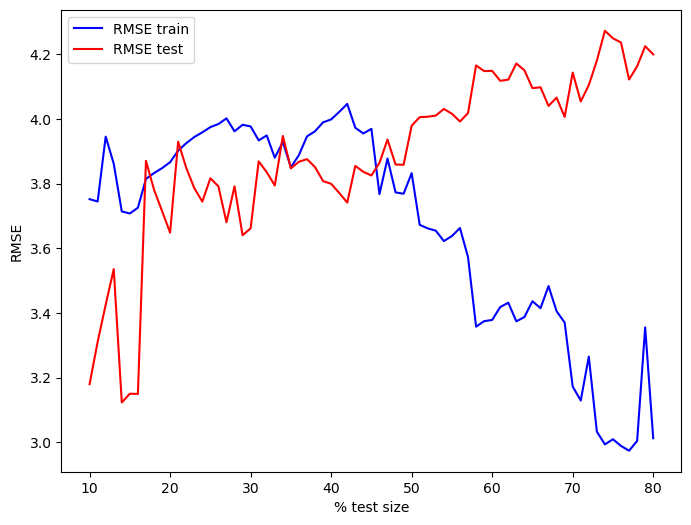

In [1273]:
# Courbes RMSE
x = list(range(10, 81))
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=x, y=rmse_train, ax=ax, color="blue", label="RMSE train")
sns.lineplot(x=x, y=rmse_test, ax=ax, color="red", label="RMSE test")
ax.set_xlabel("% test size")
ax.set_ylabel("RMSE")
plt.show()


La zone de sous entraînement est représentée avec les données utilisées jusqu'à hauteur de 45 %.

In [1274]:
def rmse(score):
    return (-score)**(1/2)

In [1275]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = dt,
    X = features, 
    y = conso, 
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1)

train_scores_rmse = [rmse(np.mean(score)) for score in train_scores]
validation_scores_rmse = [rmse(np.mean(score)) for score in validation_scores]

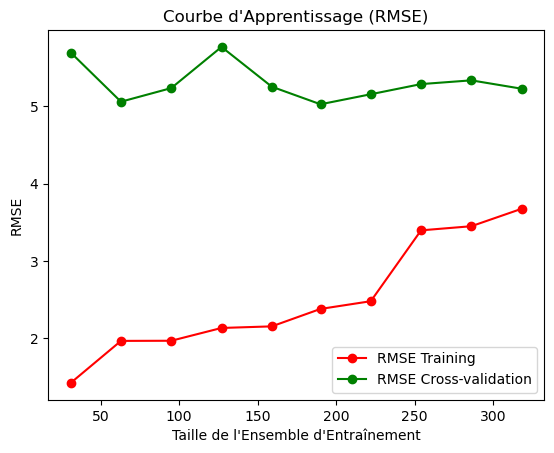

In [1276]:
plt.plot(train_sizes, train_scores_rmse, 'o-', color="r", label="RMSE Training")
plt.plot(train_sizes, validation_scores_rmse, 'o-', color="g", label="RMSE Cross-validation")

plt.title("Courbe d'Apprentissage (RMSE)")
plt.xlabel("Taille de l'Ensemble d'Entraînement")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

Exercice 2

Le bootstraping est souvent utilisé pour comprendre la variabilité des estimations. Certaines données peuvent être utilisées plusieurs fois pour l'entraînement, tandis que d'autres peuvent ne jamais être sélectionnées

La validation croisée est conçue pour tester la capacité de généralisation du modèle. Toutes les données sont utilisées à la fois pour l'entraînement et le test. Le coût de cette méthode est un temps de calcul proportionnel au nombre (k) de folds. En effet le modèle doit être entrainé et testé k fois. 

Les deux méthodes garantissent que le modèle est soumis à une variété de situations d'entraînement et de tests, ce qui aide à prévenir le surapprentissage sur un ensemble spécifique de données.

Bien que les deux méthodes soient basées sur l'idée de créer plusieurs modèles à partir de sous-ensembles de données et de les combiner pour une prédiction finale, les forêts aléatoires introduisent des concepts supplémentaires qui améliorent la performance et la robustesse des modèles.

Le bagging crée de la diversité parmi les modèles en utilisant différents sous-ensembles de données pour chaque modèle. Les forêts aléatoires vont plus loin en introduisant de la diversité non seulement au niveau des données mais aussi au niveau des caractéristiques utilisées pour chaque arbre. La diversification et la réduction des corrélations entre les arbres améliorent la performance du modèle.

Dans le bagging standard appliqué aux arbres de décision, les arbres peuvent devenir corrélés s'ils se concentrent sur les mêmes caractéristiques. Les forêts aléatoires atténuent ce problème en forçant chaque arbre à se concentrer sur différents sous-ensembles de caractéristiques, ce qui rend les arbres plus indépendants les uns des autres et améliore la performance globale du modèle.

In [1277]:
# Instanciation des arbres aléatoires 
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(
    features, conso,
    test_size=0.2,
    random_state=SEED
)

rf = RandomForestRegressor(
    max_depth = 4,
    min_samples_leaf = 0.26,
)

# Calcul du MSE et RMSE avec la validation croisée
MSE_CV = - cross_val_score(
    rf, X_train, y_train, cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

RMSE = (MSE_CV.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE))

CV RMSE: 5.05


5. Projet 4

Exercice 1

 Le bootstraping crée plusieurs échantillons à partir des données originales en rééchantillonnant avec remplacement à partir des données originales.
 Cela permet au modèle d'être entraîné sur différents ensembles de données et d'être testé sur les données non incluses dans chaque échantillon. 

Le bagging est une extension du bootstraping. Cette technique réduit la variance de l'ensemble des modèles calculés à partir des données du bootstraping. Ce qui permet de réduire le sur-apprentissge

In [1278]:
# Chargement du dataset
dataset = pd.read_csv('../csv/indian_liver_patient.csv', sep=',')
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [1279]:
# Valeurs manquantes
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [1280]:
# suppression des lignes avec des valeurs manquantes
dataset = dataset.dropna()

In [1281]:
# Caractéristiques () et cibles (malade ou non)
features = dataset.iloc[:, 2:-1]
targets = dataset["Dataset"]

# Split à 70% des données pour l'entrainement, et 30% pour les tests
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(
    features, targets,
    test_size=0.3,
    random_state=SEED
)

In [1282]:
# Instanciation dans un arbre de classification
dt = DecisionTreeClassifier(random_state=SEED)

# Instanciation d'un BaggingClassifier
bc = BaggingClassifier(estimator=dt, n_jobs=-1)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.724


In [1283]:
# Ajustement sur les données d'entrainement
dt = dt.fit(X_train, y_train)

# Prédiction des probabilités de la classe positive (2)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

# Mesure de la prédiction à détecter les vrais positifs du modèle 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label=2)
print("thresholds", thresholds)
print("recall", recall)
print("precision", precision)

thresholds [0. 1.]
recall [1.         0.55555556 0.        ]
precision [0.25862069 0.42372881 1.        ]


In [1284]:
# modèle de forêt aléatoire de classification
rf = RandomForestClassifier()

# Ajustement sur les données d'entrainement
rf = rf.fit(X_train, y_train)

# Prédiction
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

# Prédiction des probabilités de la classe positive (2)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Mesure de la prédiction à détecter les vrais positifs par le modèle 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label=2)
#print("thresholds", thresholds)
print("recall", recall)
print("precision", precision)

Accuracy of Bagging Classifier: 0.724
recall [1.         1.         1.         1.         0.97777778 0.97777778
 0.97777778 0.95555556 0.95555556 0.93333333 0.93333333 0.93333333
 0.91111111 0.91111111 0.91111111 0.91111111 0.91111111 0.91111111
 0.91111111 0.88888889 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.84444444 0.82222222 0.82222222 0.8
 0.77777778 0.77777778 0.73333333 0.71111111 0.71111111 0.68888889
 0.66666667 0.62222222 0.62222222 0.62222222 0.57777778 0.53333333
 0.53333333 0.51111111 0.48888889 0.48888889 0.46666667 0.46666667
 0.4        0.37777778 0.37777778 0.35555556 0.33333333 0.33333333
 0.26666667 0.24444444 0.24444444 0.22222222 0.2        0.13333333
 0.13333333 0.13333333 0.11111111 0.06666667 0.04444444 0.04444444
 0.04444444 0.02222222 0.         0.        ]
precision [0.25862069 0.26785714 0.27439024 0.28301887 0.28205128 0.28947368
 0.29333333 0.29861111 0.30496454 0.30656934 0.31343284 0.31578947
 0.31538462 0.3203125  0.32539683 0

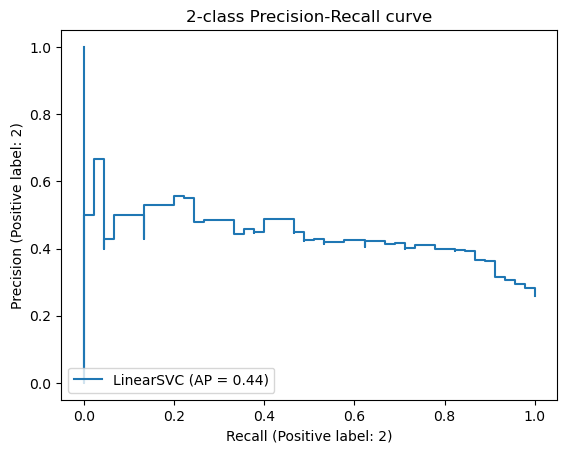

In [1285]:
display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="LinearSVC",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

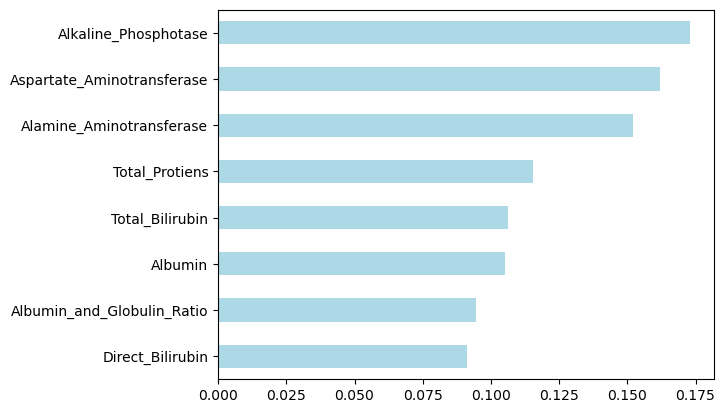

In [1286]:
# Affichage des caractéristiques par ordre d'importance pour la détection d'une maladie du foie
importances_rf = pd.Series(rf.feature_importances_, index = features.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightblue')
plt.show()

5.2 Exercice 2

GridSearchCV aide à l'optimisation des hyperparamètres d'un modèle de machine learning. Il effectue une recherche exhaustive parmi une grille spécifiée d'hyperparamètres, évaluant les combinaisons possibles à l'aide de la validation croisée pour trouver la meilleure configuration pour votre modèle.

In [1287]:
# modèle de forêt aléatoire de classification
rf = RandomForestClassifier(
    criterion="gini",
    min_samples_leaf=1,
    min_samples_split=1,
    random_state=1
)

In [1288]:
params = {
    'max_depth': [2, 3 ,4],
    'min_samples_leaf': [0.12, 0.14,0.16, 0.18]
}

# Instance GridSearch
grid_dt = GridSearchCV(
    estimator=rf, param_grid=params, 
    cv=5, n_jobs=-1
)

# Entrainement du modèle
grid_dt.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Meilleurs paramètres:", grid_dt.best_params_)
print("Meilleur score:", grid_dt.best_score_)

# Meilleurs modèle
print('Meilleur modèle: ', grid_dt.best_estimator_)

Meilleurs paramètres: {'max_depth': 2, 'min_samples_leaf': 0.16}
Meilleur score: 0.7037037037037037
Meilleur modèle:  RandomForestClassifier(max_depth=2, min_samples_leaf=0.16, min_samples_split=1,
                       random_state=1)


In [1289]:
results = pd.DataFrame(grid_dt.cv_results_)

In [1290]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.271826,0.066206,0.019233,0.007835,2,0.12,"{'max_depth': 2, 'min_samples_leaf': 0.12}",0.703704,0.679012,0.691358,0.703704,0.691358,0.693827,0.009239,10
1,0.237511,0.044258,0.019204,0.004594,2,0.14,"{'max_depth': 2, 'min_samples_leaf': 0.14}",0.703704,0.703704,0.691358,0.703704,0.703704,0.701235,0.004938,7
2,0.224500,0.019068,0.015712,0.000630,2,0.16,"{'max_depth': 2, 'min_samples_leaf': 0.16}",0.703704,0.703704,0.703704,0.703704,0.703704,0.703704,0.000000,1
3,0.246794,0.035691,0.014597,0.000302,2,0.18,"{'max_depth': 2, 'min_samples_leaf': 0.18}",0.703704,0.703704,0.703704,0.703704,0.703704,0.703704,0.000000,1
4,0.242530,0.058179,0.016278,0.001097,3,0.12,"{'max_depth': 3, 'min_samples_leaf': 0.12}",0.703704,0.641975,0.691358,0.703704,0.679012,0.683951,0.022898,11


In [1291]:
results['param_max_depth'] = pd.to_numeric(results['param_max_depth'], errors='coerce')
results['param_min_samples_leaf'] = pd.to_numeric(results['param_min_samples_leaf'], errors='coerce')
results = results.pivot(columns="param_max_depth", index="param_min_samples_leaf", values="mean_test_score")

In [1292]:
results

param_max_depth,2,3,4
param_min_samples_leaf,,,
0.12,0.693827,0.683951,0.683951
0.14,0.701235,0.701235,0.701235
0.16,0.703704,0.703704,0.703704
0.18,0.703704,0.703704,0.703704


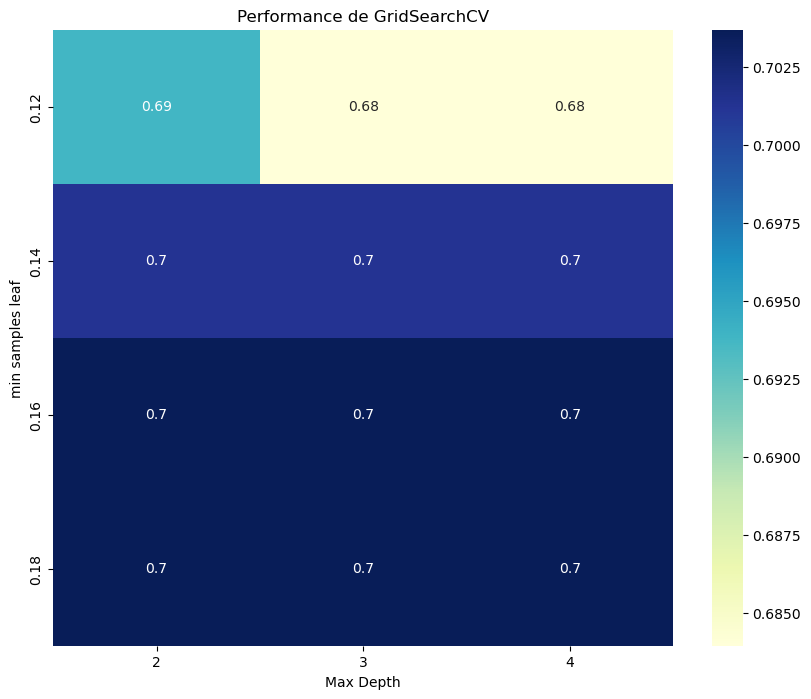

In [1293]:
# Création du heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(results, annot=True, cmap="YlGnBu")
plt.title("Performance de GridSearchCV")
plt.xlabel("Max Depth")
plt.ylabel("min samples leaf")
plt.show()